<a href="https://colab.research.google.com/github/josgarkam/Tareas-CII-2021-2022/blob/main/Tranferencia_de_Estilos_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

content_path = tf.keras.utils.get_file('Obama', 
                                       'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/640px-President_Barack_Obama.jpg')


style_path = tf.keras.utils.get_file('Van Gogh',
                                     'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Metropolitan.jpg/1200px-Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Metropolitan.jpg')


933888/922255 [==============================] - 0s 0us/step


In [ ]:
def img_scaler(image, max_dim = 512):

  # Casts a tensor to a new type.
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)

  # Creates a scale constant for the image
  scale_ratio = max_dim / max(original_shape)

  # Casts a tensor to a new type.
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)

  # Resizes the image based on the scaling constant generated above
  return tf.image.resize(image, new_shape)

In [ ]:
def load_img(path_to_img):

  # Reads and outputs the entire contents of the input filename.
  img = tf.io.read_file(path_to_img)

  # Detect whether an image is a BMP, GIF, JPEG, or PNG, and 
  # performs the appropriate operation to convert the input 
  # bytes string into a Tensor of type dtype
  img = tf.image.decode_image(img, channels=3)

  # Convert image to dtype, scaling (MinMax Normalization) its values if needed.
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Scale the image using the custom function we created
  img = img_scaler(img)

  # Adds a fourth dimension to the Tensor because
  # the model requires a 4-dimensional Tensor
  return img[tf.newaxis, :]

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

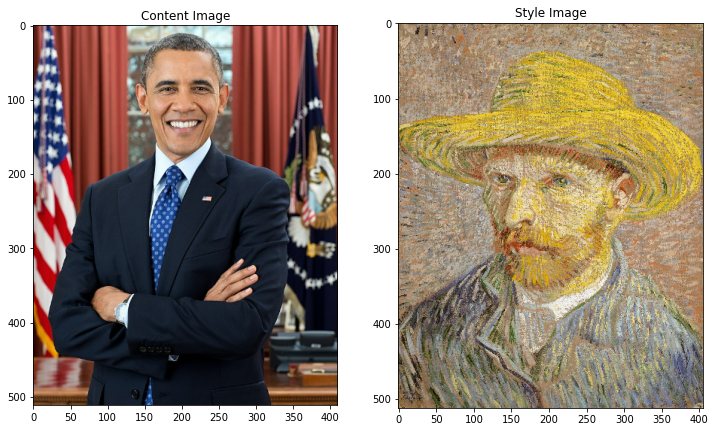

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

In [ ]:
import tensorflow_hub as hub

# Load Magenta's Arbitrary Image Stylization network from TensorFlow Hub  
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

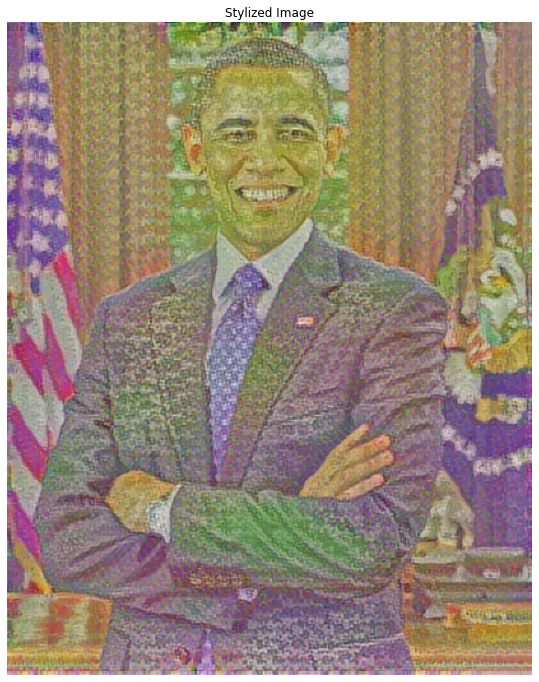

In [ ]:
# Set the size of the plot figure
plt.figure(figsize=(12, 12))

# Plot the stylized image
plt.imshow(stylized_image[0])

# Add title to the plot
plt.title('Stylized Image')

# Hide axes
plt.axis('off')

# Show the plot
plt.show()